<a href="https://colab.research.google.com/github/LilianYou/dark-lily/blob/master/4_fcn_anatomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PSYCH 239: Week 2: Fully Connected Neural Network for Visual Classification


In [0]:
import torch
from torchvision import datasets, transforms
from pylab import *

In [0]:
class toOneHot(object):
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def __call__(self, integer):
        y_onehot = torch.zeros(self.num_classes)
        y_onehot[integer]=1
        return y_onehot

In [0]:
train_set = datasets.MNIST('./data',
                           train=True, download=True,
                           transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize((0.1307,), (0.3081,))
                             ]),
                           target_transform = toOneHot(num_classes = 10),)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 9619981.61it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 137547.07it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2255428.07it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 53870.59it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
test_set = datasets.MNIST('./data',
                           train=False, download=True,
                           transform=transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize((0.1307,), (0.3081,))
                             ]),
                           target_transform = toOneHot(num_classes = 10),)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100, shuffle=False)

In [0]:
data, target = next(iter(test_loader))

tensor(2)

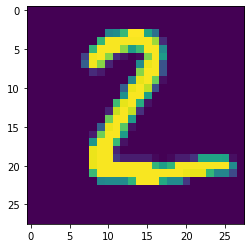

In [0]:
imshow(data[1][0])
torch.argmax(target[1])

In [0]:
net = torch.nn.Sequential(torch.nn.Linear(784, 100),
                                  torch.nn.Sigmoid(), #this is an activation function
                                  torch.nn.Linear(100, 10),
                                  torch.nn.Sigmoid())

In [0]:
mse_loss = torch.nn.MSELoss()
opt = torch.optim.Adam(net.parameters(), lr=1e-3)

In [0]:
def train_step(x, t, net, opt_fn, loss_fn):
    y = net(x)
    loss = loss_fn(y, t)
    loss.backward()
    opt_fn.step()
    opt_fn.zero_grad()
    return loss

In [0]:
x,t = next(iter(train_loader))
train_step(x.view(-1,784), t, net, opt, mse_loss)

tensor(0.0949, grad_fn=<MseLossBackward>)

Make prediction

In [0]:
x,t = next(iter(test_loader))   
y = net(x.view(-1,784))

In [0]:
torch.argmax(y[1])

tensor(0)

In [0]:
torch.argmax(t[1])

tensor(2)

In [0]:
y.argmax(1)

tensor([7, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0,
        0, 0, 7, 0, 0, 1, 3, 1, 3, 0, 0, 0, 7, 1, 0, 1, 1, 0, 7, 0, 3, 0, 3, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 0, 3, 0, 0, 3, 0, 7, 0,
        0, 0, 1, 7, 3, 7, 0, 0, 0, 0, 0, 7, 0, 0, 7, 0, 0, 1, 0, 0, 0, 3, 1, 0,
        3, 0, 0, 0])

Calculate accuracy

In [0]:
torch.mean((t.argmax(1) == y.argmax(1)).float())

Train the network over multiple epochs

In [0]:
acc_batch = []
for epoch in range(5):
    net.train() #training mode
    for x,t in iter(train_loader):   
        loss_ = train_step(x.view(-1,784), t, net, opt, mse_loss)

    net.eval() #evaluation mode
    for x,t in iter(test_loader):   
        y = net(x.view(-1,784))
        acc_batch.append(torch.mean((t.argmax(1) == y.argmax(1)).float()))
    print(torch.mean(torch.FloatTensor(acc_batch)))
    

tensor(0.0219, grad_fn=<MseLossBackward>)
tensor(0.9184)
tensor(0.0076, grad_fn=<MseLossBackward>)
tensor(0.9265)
tensor(0.0129, grad_fn=<MseLossBackward>)
tensor(0.9327)
tensor(0.0118, grad_fn=<MseLossBackward>)
tensor(0.9376)
tensor(0.0084, grad_fn=<MseLossBackward>)
tensor(0.9411)


In [0]:
y[0]

tensor([1.8201e-03, 1.8449e-02, 8.1689e-03, 6.7291e-03, 8.4436e-03, 2.5069e-02,
        1.0713e-02, 3.3063e-04, 9.7456e-01, 2.0896e-03],
       grad_fn=<SelectBackward>)

In [0]:
t[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])